In [1]:
import os
import torch
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
from pixelmed_calc.medical_imaging.modelstore import get_model_from_name
#可改参数
model='resnet50_3D'
num_classes=2
pretrained=True
in_channels=1
batch_size=4
learning_rate=1e-4
epochs=10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
#video = torch.randn(4, 1, 16, 128, 128).to("cuda") # (batch, channels, frames, height, width)

model=get_model_from_name['vit_3D'](
    image_size = 128,          # image size
    frames = 16,               # number of frames
    image_patch_size = 16,     # image patch size
    frame_patch_size = 2,      # frame patch size
    num_classes = 2,
    channels=1,
    dim = 1024,
    depth = 6,
    heads = 8,
    mlp_dim = 2048,
    dropout = 0.1,
    emb_dropout = 0.1
).to(device)

#out=model(video)

model.load_state_dict(torch.load(r'd:\pixelmedAI\function_pm\note2-深度学习分类\results\latest_model.pth'))
model.eval()

ViT(
  (to_patch_embedding): Sequential(
    (0): Rearrange('b c (f pf) (h p1) (w p2) -> b (f h w) (p1 p2 pf c)', p1=16, p2=16, pf=2)
    (1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
    (2): Linear(in_features=512, out_features=1024, bias=True)
    (3): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (transformer): Transformer(
    (layers): ModuleList(
      (0-5): 6 x ModuleList(
        (0): Attention(
          (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (attend): Softmax(dim=-1)
          (dropout): Dropout(p=0.1, inplace=False)
          (to_qkv): Linear(in_features=1024, out_features=1536, bias=False)
          (to_out): Sequential(
            (0): Linear(in_features=512, out_features=1024, bias=True)
            (1): Dropout(p=0.1, inplace=False)
          )
        )
        (1): FeedForward(
          (net): Sequential(
            (0): LayerNorm((1024,), eps=1e-05, elementwis

In [2]:
for name, module in model.named_modules():  
    print(name, module)  

 ViT(
  (to_patch_embedding): Sequential(
    (0): Rearrange('b c (f pf) (h p1) (w p2) -> b (f h w) (p1 p2 pf c)', p1=16, p2=16, pf=2)
    (1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
    (2): Linear(in_features=512, out_features=1024, bias=True)
    (3): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (transformer): Transformer(
    (layers): ModuleList(
      (0-5): 6 x ModuleList(
        (0): Attention(
          (norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (attend): Softmax(dim=-1)
          (dropout): Dropout(p=0.1, inplace=False)
          (to_qkv): Linear(in_features=1024, out_features=1536, bias=False)
          (to_out): Sequential(
            (0): Linear(in_features=512, out_features=1024, bias=True)
            (1): Dropout(p=0.1, inplace=False)
          )
        )
        (1): FeedForward(
          (net): Sequential(
            (0): LayerNorm((1024,), eps=1e-05, elementwi

In [3]:
from pixelmed_calc.medical_imaging.DLtools.process import load_data_from_csv,get_file_and_labels,get_transforms,train_and_validate
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
import torch
import torch.nn as nn
from monai.data import ImageDataset
import os
import pandas as pd
from torch.utils.data import DataLoader

# CSV文件路径
csv_path = r"D:\pixelmedAI\function_pm\pm_data\liangxing\group.csv"#'E:\127lungnode\lungnode\group.csv'
train_base_path = r"D:\pixelmedAI\function_pm\pm_data\liangxing\images"#'E:\127lungnode\lungnode\crop3d'
val_base_path = r"D:\pixelmedAI\function_pm\pm_data\liangxing\images"#'E:\127lungnode\lungnode\crop3d'

tfs=get_transforms(resize=[16,128,128])
# 读取所有数据
file_names, labels, groups = load_data_from_csv(csv_path)
# 获取训练数据和标签（可以设置 base_path 为 None 或实际路径）
file_train, train_labels = get_file_and_labels(file_names, labels, groups, 'train', train_base_path)
# 获取验证数据和标签（可以设置 base_path 为 None 或实际路径）
file_val, val_labels = get_file_and_labels(file_names, labels, groups, 'val', val_base_path)

# 假设你已经定义了 ImageDataset 和 train_transforms, val_transforms
train_ds = ImageDataset(image_files=file_train, labels=train_labels, transform=tfs)
train_loader = DataLoader(train_ds, batch_size=4, shuffle=False, num_workers=0, pin_memory=torch.cuda.is_available())

val_ds = ImageDataset(image_files=file_val, labels=val_labels, transform=tfs)
val_loader = DataLoader(val_ds, batch_size=1, shuffle=False, num_workers=0, pin_memory=torch.cuda.is_available())

<class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.


In [9]:
file_val

['D:\\pixelmedAI\\function_pm\\pm_data\\liangxing\\images\\data6.nii.gz',
 'D:\\pixelmedAI\\function_pm\\pm_data\\liangxing\\images\\data7.nii.gz',
 'D:\\pixelmedAI\\function_pm\\pm_data\\liangxing\\images\\data8.nii.gz',
 'D:\\pixelmedAI\\function_pm\\pm_data\\liangxing\\images\\data9.nii.gz',
 'D:\\pixelmedAI\\function_pm\\pm_data\\liangxing\\images\\data10.nii.gz']

In [4]:
samples=[]
for sample in val_loader:
    s=sample[0].to(device) 
    samples.append(s)

torch.Size([8, 513, 513])
result torch.Size([22, 22])
(128, 128)
torch.Size([1, 1, 128, 128])


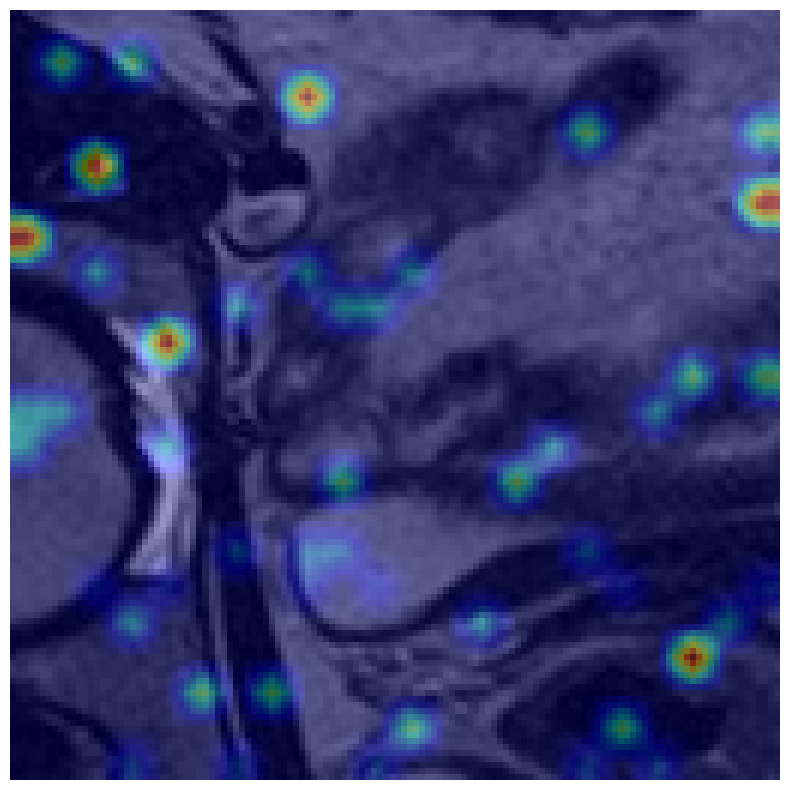

In [10]:
#此代码是多头自注意力机制（方案一）
from pixelmed_calc.medical_imaging.DLtools.plot_tmme import find_attention_layer,overlay_attention_map
import torch
attention_layer = find_attention_layer(model)  # 获取注意力层

for i, sample in enumerate(samples[4:5]):
    input_image = sample.to(device)
    #input_image  = input_image.view(1, *input_image.size()).to(device)
    with torch.no_grad():
        model(input_image)
    attention_weights = attention_layer.weights
    overlay_attention_map(input_image, attention_weights,alpha=0.4,file_path=file_val[4:5][0])

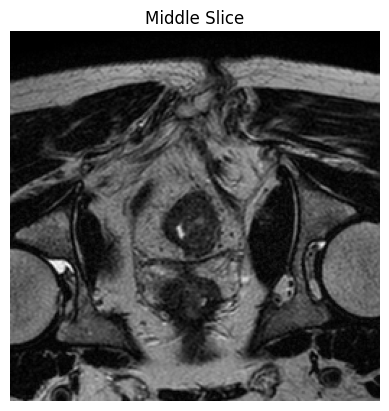

In [11]:
import nibabel as nib  
import numpy as np  
import matplotlib.pyplot as plt  

# 文件路径  
file_path = 'D:\\pixelmedAI\\function_pm\\pm_data\\liangxing\\images\\data9.nii.gz'  

# 读取NIfTI文件  
nii_img = nib.load(file_path)  
img_data = nii_img.get_fdata()  

# 获取中间层  
mid_slice = img_data.shape[2] // 2  
slice_data = img_data[:, :, mid_slice]  

# 可视化中间层  
plt.imshow(slice_data.T, cmap='gray', origin='lower')  
plt.title('Middle Slice')  
plt.axis('off')  
plt.show()